Прежде чем погрузиться в формальные определения стационарности и связанные с ней концепции, разберёмся, почему они важны.

## Стационарность означает, что сам временной ряд может меняться с течением времени, однако статистические свойства генерирующего его процесса не меняются.

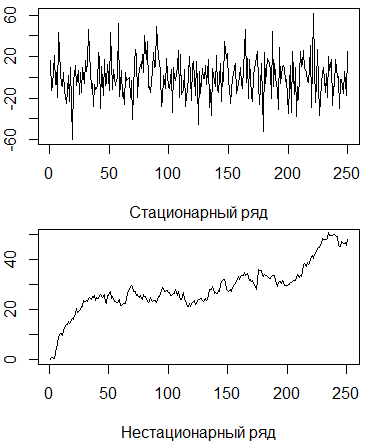

Почему это важно? Потому что стационарные процессы легче анализировать, а ещё их можно предсказывать, поскольку предсказуем способ их изменения.

Говоря простым языком, стационарный процесс (стационарный временной ряд) — это процесс, который не меняет свои основные характеристики со временем (обратите внимание на графики стационарного и нестационарного временного ряда выше). Это значит, что при сдвиге во времени не меняются математическое ожидание, дисперсия и совместное распределение вероятности.

Примером стационарного процесса является маятник без трения, который колеблется назад и вперёд. Из-за отсутствия трения его амплитуда и частота остаются неизменными.

+ В нашем же случае временной ряд будет **стационарным**, если у него отсутствуют тренд и сезонность, а математическое ожидание и дисперсия при этом остаются постоянными на протяжении всего периода времени.
+ У **нестационарного** временного ряда статистики (математическое ожидание и дисперсия) будут изменяться со временем, а сам ряд будет иметь сезонность и/или тренд.
Так как нестационарный ряд анализировать труднее, в анализе временных рядов принято приводить любой временной ряд к стационарности. Это можно сделать путём выявления и устранения тренда и сезонности.

Существует несколько методов проверки временного ряда на стационарность:

1. Визуально оценить по графику данных, есть ли какие-либо очевидные тенденции или сезонность. Например, на графике ниже нет ни выраженного тренда, ни сезонности.

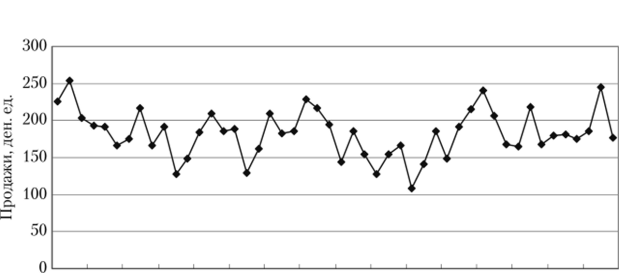

2. Просмотреть сводную статистику для данных по сезонам, чтобы понять, есть ли очевидные и существенные различия.
3. Использовать статистические тесты, чтобы проверить, выполняются ли ожидания стационарности. О статистических тестах пойдёт речь ниже.

# СТАТИСТИЧЕСКИЕ ТЕСТЫ НА PYTHON

Одним из наиболее распространённых тестов на проверку временного ряда на стационарность является **расширенный тест Дики — Фуллера**. В тесте формулируется две гипотезы:

+ нулевая гипотеза (H0): временной ряд нестационарный, то есть имеет некоторый тренд и сезонную компоненту;
+ альтернативная гипотеза (H1): временной ряд стационарный, то есть не имеет тренда и сезонной компоненты, и данные скорее случайны.

В результате проведения теста мы получим несколько значений: значение статистики из теста и критические значения разных уровней значимости (1 %, 2 %, 3 %). Уровень значимости означает допустимую  для данной задачи вероятность ошибки, то есть чем ниже уровень значимости, тем ниже вероятность ошибочного результата теста.

+ Если значение статистики ниже критического значения выбранного уровня значимости, отвергаем гипотезу H0 и принимаем гипотезу H1 (ряд стационарный).
+ Если значение статистики выше критического значения выбранного уровня значимости, принимаем гипотезу H0 (ряд нестационарный).

Рассмотрим пример проведения теста Дики — Фуллера на данных временного ряда Daily Total Female Births. В данных содержится количественная информация о девочках, рождённых за несколько месяцев. Для проведения теста будем использовать функцию adfuller() из пакета statsmodels.

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(
	"daily-total-female-births.csv", 
    header=0, 
    index_col=0
).squeeze("columns")

result = adfuller(df.values)

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")

for key, value in result[4].items():
	print(f"\t{key}: {value:.3f}")

ADF Statistic: -4.808291253559765
p-value: 5.2434129901498554e-05
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


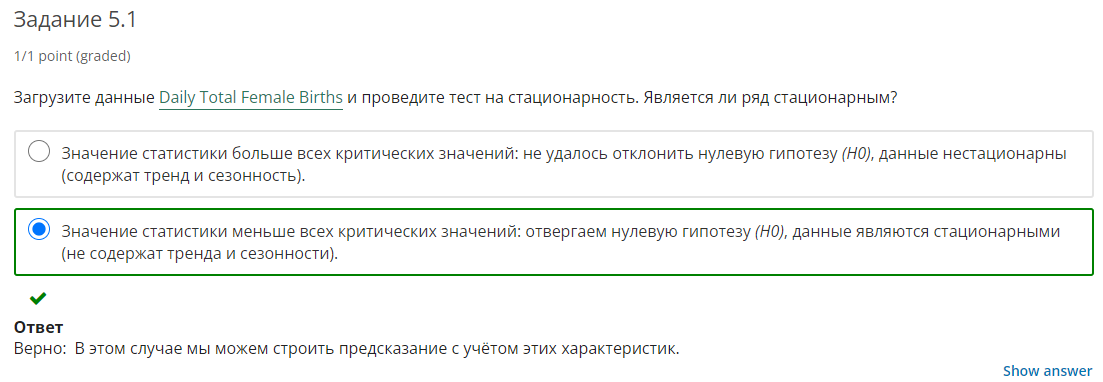

# ЧТО ДЕЛАТЬ, ЕСЛИ РЯД НЕСТАЦИОНАРНЫЙ?

Если тест на стационарность показал, что ряд нестационарный и в нём присутствуют тренд и сезонность, необходимо избавиться от них.

Обычно для этого достаточно взять разность рядов. Разность выполняется путём дифференцирования ряда, для этого вычисляется разность между двумя соседними наблюдениями ряда. Если полученная первая разность ряда окажется стационарной, то этот ряд называется **интегрированным рядом первого порядка**.

Для определения **порядка интегрированного ряда** необходимо сделать следующее:

1. Получить новый ряд посредством взятия разности (применяем к необходимому датафрейму):



```
df_diff_1 = df.diff().dropna()
```

2. Провести для нового ряда тест на стационарность (например, тест Дики — Фуллера):



```
test1 = adfuller(df_diff_1)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')
```

Если полученный ряд нестационарен, можно провести эту процедуру ещё раз, то есть ещё раз дифференцировать разность ряда, полученную на предыдущем этапе.

Если после двукратного дифференцирования результат окажется стационарным временным рядом, то исходный временной ряд будет называться интегрированным рядом второго порядка, и так далее.

**Запомните этот момент**: в юните об авторегрессии нам пригодится порядок разности, приводящий ряд к стационарности.



In [2]:
df_diff_1 = df.diff().dropna()

In [3]:
test1 = adfuller(df_diff_1)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -12.62517863387136
p-value:  1.5472400091968453e-23
Critical values:  {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}
ряд стационарен
